<a href="https://colab.research.google.com/github/JakeOh/202007_itw_bd18/blob/master/lab_ml/ml05_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Normal Equation

In [4]:
np.random.seed(1)

X = np.arange(0, 3).reshape((3, 1))
y = 4 + 3 * X + np.random.randn(3, 1)

X.shape, y.shape

((3, 1), (3, 1))

In [6]:
print(X)
print(y)

[[0]
 [1]
 [2]]
[[5.62434536]
 [6.38824359]
 [9.47182825]]


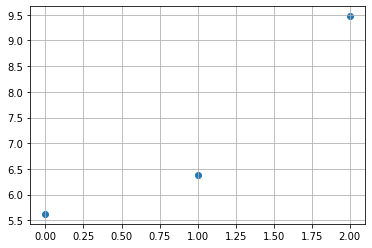

In [5]:
plt.scatter(X, y)
plt.grid()

In [7]:
X_b = np.c_[np.ones(shape=(3, 1)), X]
X_b

array([[1., 0.],
       [1., 1.],
       [1., 2.]])

In [8]:
# MSE를 최소화하는 [b0, b1]을 찾는 게 선형 회귀의 목적.
# [b0, b1]을 찾는 방법 1: 정규 방정식(normal equation)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best  #> [[y절편], [기울기]]

array([[5.23773096],
       [1.92374144]])

In [9]:
y_pred = X_b @ theta_best
y_pred

array([[5.23773096],
       [7.1614724 ],
       [9.08521384]])

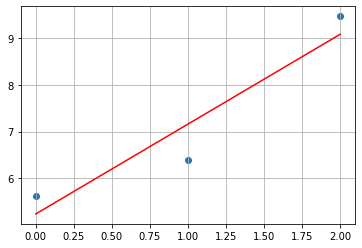

In [11]:
plt.scatter(X, y)
plt.plot(X, y_pred, 'r-')
plt.grid()

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)  
# fit: 선형 회귀 방정식의 절편(intercept)과 기울기(coefficient)들을 찾는 과정.
lin_reg.intercept_, lin_reg.coef_

(array([5.23773096]), array([[1.92374144]]))

In [14]:
y_pred = lin_reg.predict(X)
y_pred

array([[5.23773096],
       [7.1614724 ],
       [9.08521384]])

# Gradient Descent(경사 하강법)

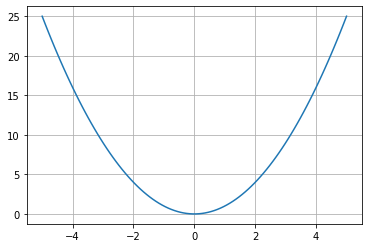

In [15]:
X = np.linspace(start=-5, stop=5, num=100)
y = X ** 2

plt.plot(X, y, '-')
plt.grid()

## 기울기

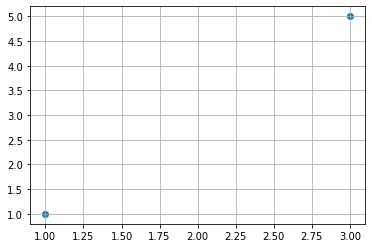

In [16]:
# 기울기: (y의 증가분) / (x의 증가분)
pt1 = [1, 1]
pt2 = [3, 5]

plt.scatter([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.grid()

In [18]:
delta_y = pt2[1] - pt1[1]  # y 증가(감소)분
delta_x = pt2[0] - pt1[0]  # x 증가(감소)분
slope = delta_y  / delta_x
slope

2.0

In [20]:
def gradient(fn, x, h=0.001):
    return (fn(x + h) - fn(x)) / h

In [21]:
def square(x):
    return x**2

In [22]:
# y = x**2 그래프에서 x=4에서의 접선의 기울기(gradient)
gradient(fn=square, x=4)

8.0010000000037

In [23]:
gradient(fn=square, x=2), gradient(fn=square, x=0)

(4.000999999999699, 0.001)

In [24]:
gradient(fn=square, x=-2)

-3.9989999999994197

## 경사 하강법
1. 임의의 점(`x_init`)을 선택
2. 그 점에서의 grdient(기울기)를 계산
3. 선택한 임의의 점을 이동: `x_new = x_init - eta * gradient`
4. 2 ~ 3의 과정을 반복.
* eta: 양수(eta > 0). 학습률(learning rate). eta가 크면 최솟값으로 빨리 수렴, 작으면 느리게 수렴.

In [25]:
def plot_function(fn):
    X = np.linspace(start=-5, stop=5, num=100)
    y = fn(X)
    plt.plot(X, y, '-')

In [34]:
 def plot_gradient_descent(fn, x_init, n_iterations=5, eta=0.1):
    plot_function(fn)  # y = x ** 2

    # x_init = -4
    y_init = fn(x_init)
    plt.scatter(x_init, y_init, label='0', color='red')

    # eta = 0.1
    for epoch in range(n_iterations):
        x_new = x_init - eta * gradient(fn, x=x_init)
        y_new = fn(x_new)
        plt.scatter(x_new, y_new, label=f'{epoch+1}')
        x_init = x_new

    plt.grid()
    plt.legend()

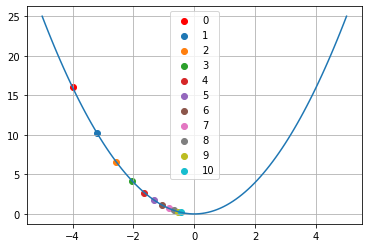

In [36]:
plot_gradient_descent(fn=square, x_init=-4, n_iterations=10)

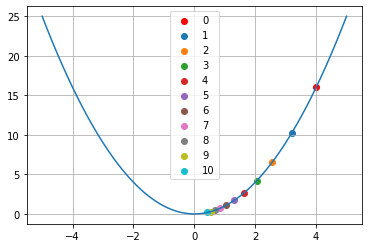

In [37]:
plot_gradient_descent(fn=square, x_init=4, n_iterations=10)

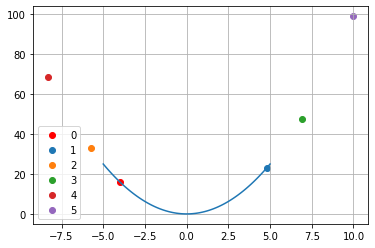

In [45]:
plot_gradient_descent(fn=square, x_init=-4, n_iterations=5, eta=1.1)

# 경사하강법을 사용한 선형 회귀 방정식의 절편, 기울기 찾기: 
* 선형 회귀 방정식: `y = b0 + b1 * x`
* 절편(intercept, bias 편향): `b0`
* 기울기(coefficient): `b1`

In [46]:
 np.random.seed(1)

 X = np.arange(0, 3).reshape((3, 1))
 y = 4 + 3 * X + np.random.randn(3, 1)

In [47]:
X

array([[0],
       [1],
       [2]])

In [48]:
y

array([[5.62434536],
       [6.38824359],
       [9.47182825]])

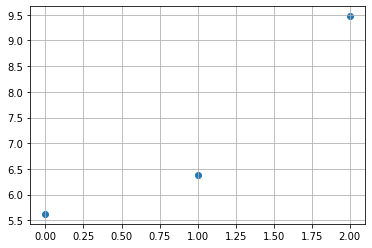

In [50]:
plt.scatter(X, y)
plt.grid()

In [49]:
X_b = np.c_[np.ones(shape=(3, 1)), X]
X_b

array([[1., 0.],
       [1., 1.],
       [1., 2.]])

In [55]:
eta = 0.1  # 학습률(learning rate)
m = 3  # 샘플 개수
n_iterations = 1000  # 반복 횟수

np.random.seed(1)
theta = np.random.randn(2, 1)  # [[b0], [b1]] 초깃값 - 난수 사용
print(theta)

for epoch in range(n_iterations):
    gradient = (2/m) * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradient

print(theta)

[[ 1.62434536]
 [-0.61175641]]
[[5.23773096]
 [1.92374144]]


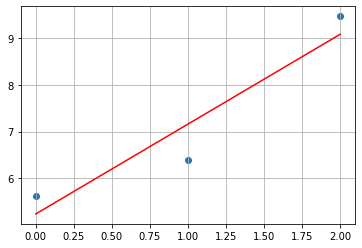

In [60]:
y_pred = X_b @ theta

plt.scatter(X, y)
plt.plot(X, y_pred, 'r-')
plt.grid()

In [56]:
from sklearn.linear_model import SGDRegressor

In [61]:
sgd_reg = SGDRegressor(eta0=0.1)
sgd_reg.fit(X, y.ravel())
# fit: MSE를 최소화하는 절편 b0와 계수 b1을 찾음.

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [62]:
sgd_reg.intercept_, sgd_reg.coef_
# predict: y = intercept_ + coef_ * x

(array([4.94745821]), array([2.1425144]))